In [2]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [3]:
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number
outputname = base_proc + dataset+FOI+"_spin.pkl"
df = pd.read_pickle(outputname)

In [8]:
def freq_phase_extractor(df_spin,full=True):
    frequency = 3
    no_harmonics=15
    if(full==True): fq = np.arange(10,25000,10)
    if(full==False): fq= np.arange(frequency*10,no_harmonics*10*frequency,10*frequency)   
    for f in tqdm(fq):
        foi =[]
        poi=[]
        for i in range(len(df_spin)):
            foi.append(df_spin.spin_amp[i][f-5:f+5].mean())
            poi.append(df_spin.spin_phase[i][f-5:f+5].mean())
        df_spin["freq_%d" %(f/10)] = foi
        df_spin["phase_%d"%(f/10)] = poi
    return df_spin

In [5]:
df= freq_phase_extractor(df,full=True)

100%|██████████| 2499/2499 [24:08<00:00,  1.68it/s]


In [3]:
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
#df_red = df.drop(columns=["spin_amp","spin_phase","spin_time"])
#df_red.to_pickle(outputname)

In [5]:
# load the files
bead_date =20200320
bead_number = 1


In [9]:
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number
outputname = base_proc + dataset+FOI+"_spin.pkl"
df_b = pd.read_pickle(outputname)

In [10]:
df_b= freq_phase_extractor(df_b,full=True)

100%|██████████| 2499/2499 [02:29<00:00, 16.70it/s]


In [12]:
base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df_red = df_b.drop(columns=["spin_amp","spin_phase","spin_time"])
df_red.to_pickle(outputname)

In [19]:
# load the files
bead_date =20200320
bead_number = 1
dataset = "/Shaking/Shaking378/"
FOI = "Shaking3"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI

base_proc = "/data/new_trap_processed/processed_files/" + str(bead_date) +  "/Bead%s/" %bead_number
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df_spin = pd.read_pickle(outputname)

In [20]:
dataset = "Shaking/Shaking2_20200403/"
FOI = "NoShaking_1"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset
filename = dirname + FOI
outputname = base_proc + dataset+FOI+"_spin_full_freq_only.pkl"
df_spin_b = pd.read_pickle(outputname)

In [33]:
import gif
@gif.frame
def plot1(norm,x, y,inp):
    plt.figure(figsize=(16, 12), dpi=50)
    plt.plot(x,norm)
    plt.plot(x, y)
    plt.yscale("log")
    plt.ylim(1e-11,1e-3)
    plt.xlim(0,100)
    plt.xlabel("frequency [Hz]")
    plt.ylabel("PSD [a.u.]")
    plt.title("dataset %d" %inp)
    #plt.legend()
    
frames = []
x = np.arange(0,2500.1,0.1)
step_size=100
norm = df["spin_fft"][50]
for i in np.arange(0,10000,step_size):
    y1 = df["spin_fft"][i]
    frame =  plot1(norm,x,y1,i) 
    frames.append(frame)
    #y2 = df_nos1["spin_fft"][i+2*step_size:i+3*step_size].mean()

gif.save(frames, "Temporary_Plots/psd_super_zoom_data.gif", duration=500)


In [112]:
df_z = pd.DataFrame()
for j in range(15):
    list1 = []
    for i in range(len(df_data)):
        list1.append(df_data.amplitude_z[i][j])
    df_z["list%d"%j] = list1         

In [113]:
df_x = pd.DataFrame()
for j in range(15):
    list1 = []
    for i in range(len(df_data)):
        list1.append(df_data.amplitude_x[i][j])
    df_x["list%d"%j] = list1         

In [317]:
df_spin = pd.DataFrame()
for j in range(15):
    list2 =[]
    for i in range(len(df)):
        list2.append(df.spin_fft[i][(j+1)*30])
    df_spin["list%d"%j]=np.multiply(list2,1)    

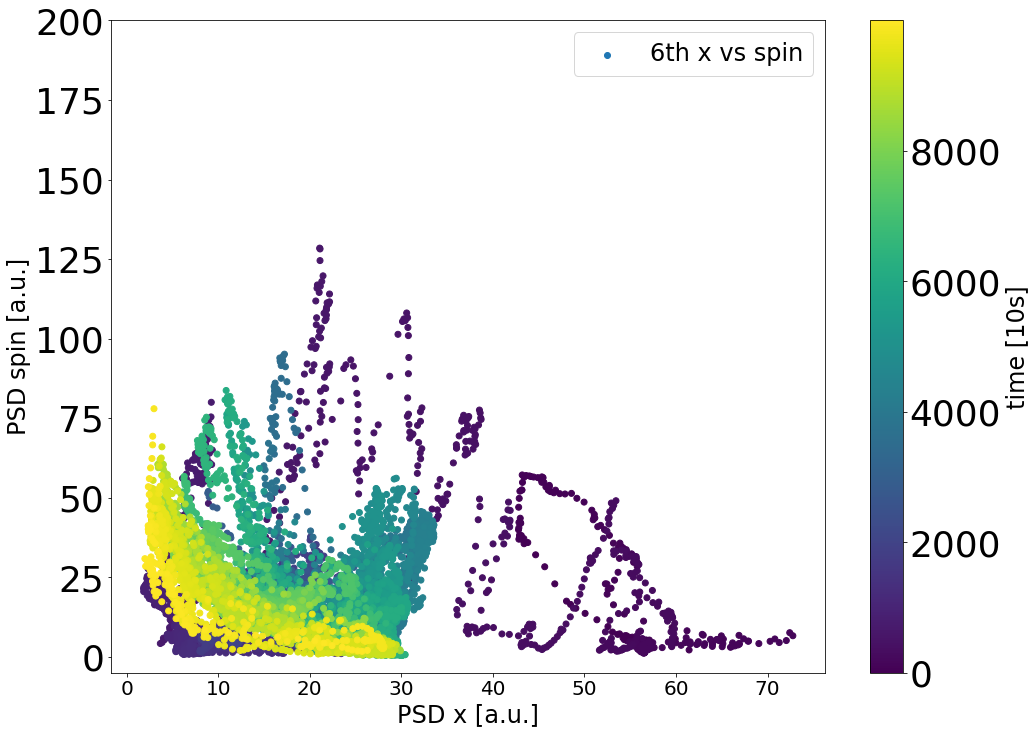

In [474]:
for i in [5]:
    #fig, ax = plt.subplots()
    cm = plt.cm.get_cmap('viridis')
    caxis = df_z.indexa
    x = np.arange(0,100000,10)
    y1=np.multiply(1,df_z["list%d"%i].ewm(span=200,adjust=True).mean())
    y2=np.multiply(1/df_x["list%d" %i].mean()*df_z["list%d"%i].mean(),df_x["list%d"%i].ewm(span=10,adjust=True).mean())
    y3=np.multiply(1/df_spin["list%d" %i].mean()*df_z["list%d"%i].mean(),df_spin["list%d" %i].ewm(span=10,adjust=True).mean())
 
    s=plt.scatter(y2,y3,c=caxis,cmap=cm,label="%dth x vs spin" %(i+1))
    #plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
plt.ylabel("PSD spin [a.u.]")
plt.xlabel("PSD x [a.u.]")
plt.legend()
plt.ylim(-5,200)
#plt.savefig("%dth_correlation_x_spin_20200519.png" %(i+1),dpi=100,bbox_inches="tight")
plt.show()
 

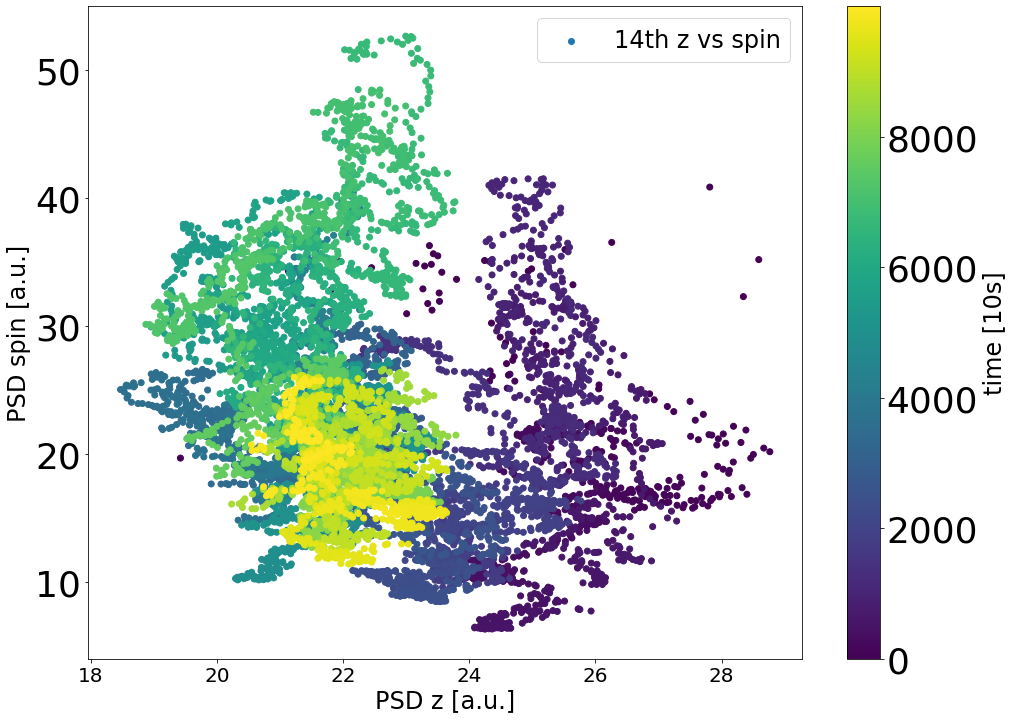

In [385]:
for i in [13]:
    fig, ax = plt.subplots()
    cm = plt.cm.get_cmap('viridis')
    caxis = df_z.index
    x = np.arange(0,100000,10)
    y1=np.multiply(1,df_z["list%d"%i].ewm(span=200,adjust=True).mean())
    y2=np.multiply(1/df_x["list%d" %i].mean()*df_z["list%d"%i].mean(),df_x["list%d"%i].ewm(span=200,adjust=True).mean())
    y3=np.multiply(1/df_spin["list%d" %i].mean()*df_z["list%d"%i].mean(),df_spin["list%d" %i].ewm(span=200,adjust=True).mean())
 
    s=plt.scatter(y1,y3,c=caxis,cmap=cm,label="%dth z vs spin" %(i+1))
    #plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
plt.ylabel("PSD spin [a.u.]")
plt.xlabel("PSD z [a.u.]")
plt.legend()
plt.savefig("%dth_correlation_z_spin_20200519.png" %(i+1),dpi=100,bbox_inches="tight")
plt.show()
 

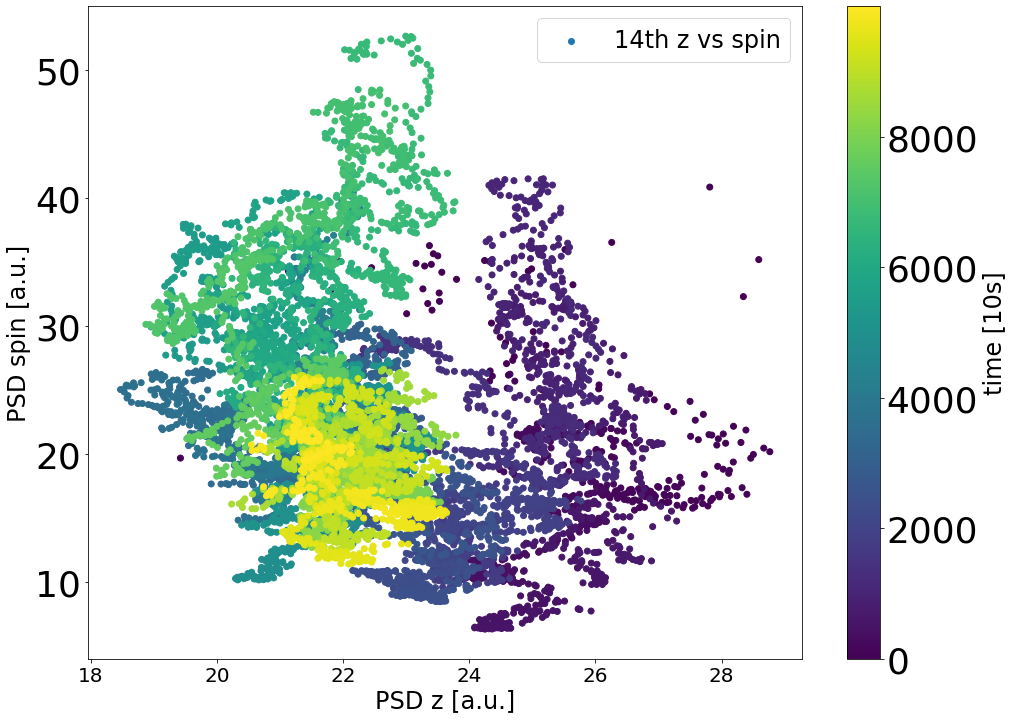

In [391]:
for i in [13]:
    fig, ax = plt.subplots()
    cm = plt.cm.get_cmap('viridis')
    caxis = df_z.index
    x = np.arange(0,100000,10)
    y1=np.multiply(1,df_z["list%d"%i].ewm(span=200,adjust=True).mean())
    y2=np.multiply(1/df_x["list%d" %i].mean()*df_z["list%d"%i].mean(),df_x["list%d"%i].ewm(span=200,adjust=True).mean())
    y3=np.multiply(1/df_spin["list%d" %i].mean()*df_z["list%d"%i].mean(),df_spin["list%d" %i].ewm(span=200,adjust=True).mean())
 
    s=plt.scatter(y1,y3,c=caxis,cmap=cm,label="%dth z vs spin" %(i+1))
    #plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
plt.ylabel("PSD spin [a.u.]")
plt.xlabel("PSD z [a.u.]")
plt.legend()
plt.savefig("%dth_correlation_z_x_20200519.png" %(i+1),dpi=100,bbox_inches="tight")
plt.show()
 

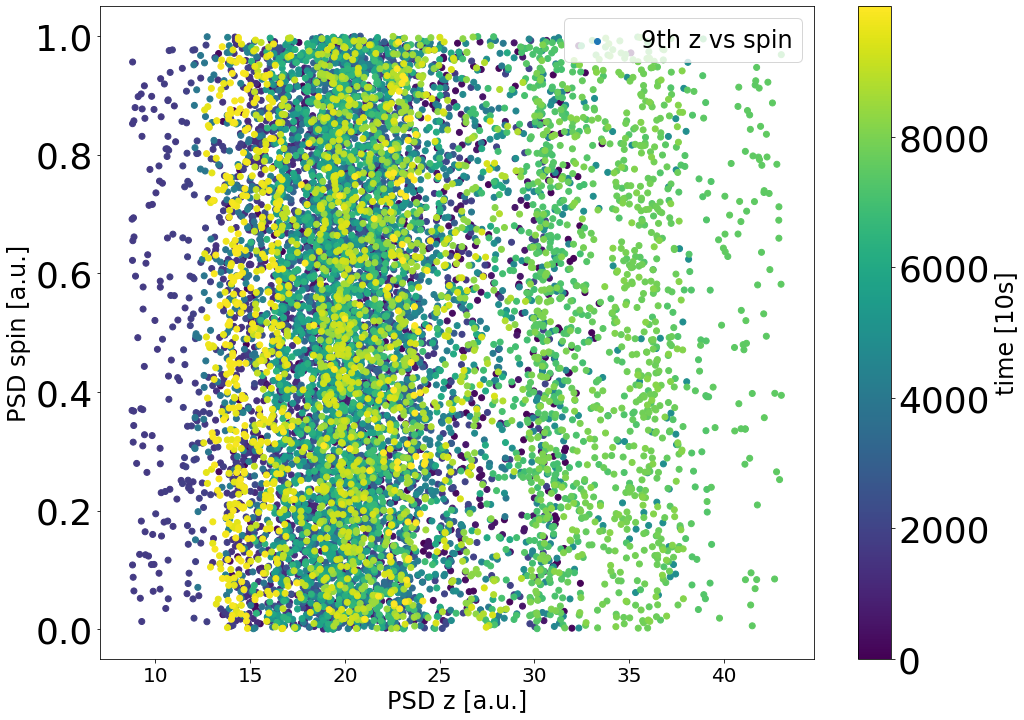

In [438]:
for i in [8]:
    fig, ax = plt.subplots()
    cm = plt.cm.get_cmap('viridis')
    caxis = df_z.index
    x = np.arange(0,100000,10)
    y1=np.multiply(1,df_z["list%d"%i].ewm(span=200,adjust=True).mean())
    y2=np.multiply(1/df_x["list%d" %i].mean()*df_z["list%d"%i].mean(),df_x["list%d"%i].ewm(span=200,adjust=True).mean())
    y3=np.multiply(1/df_spin["list%d" %i].mean()*df_z["list%d"%i].mean(),df_spin["list%d" %i].ewm(span=200,adjust=True).mean())
 
    s=plt.scatter(y2,make_random,c=caxis,cmap=cm,label="%dth z vs spin" %(i+1))
    #plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
plt.ylabel("PSD spin [a.u.]")
plt.xlabel("PSD z [a.u.]")
plt.legend()
#plt.savefig("%dth_correlation_z_x_20200519.png" %(i+1),dpi=100,bbox_inches="tight")
plt.show()
 

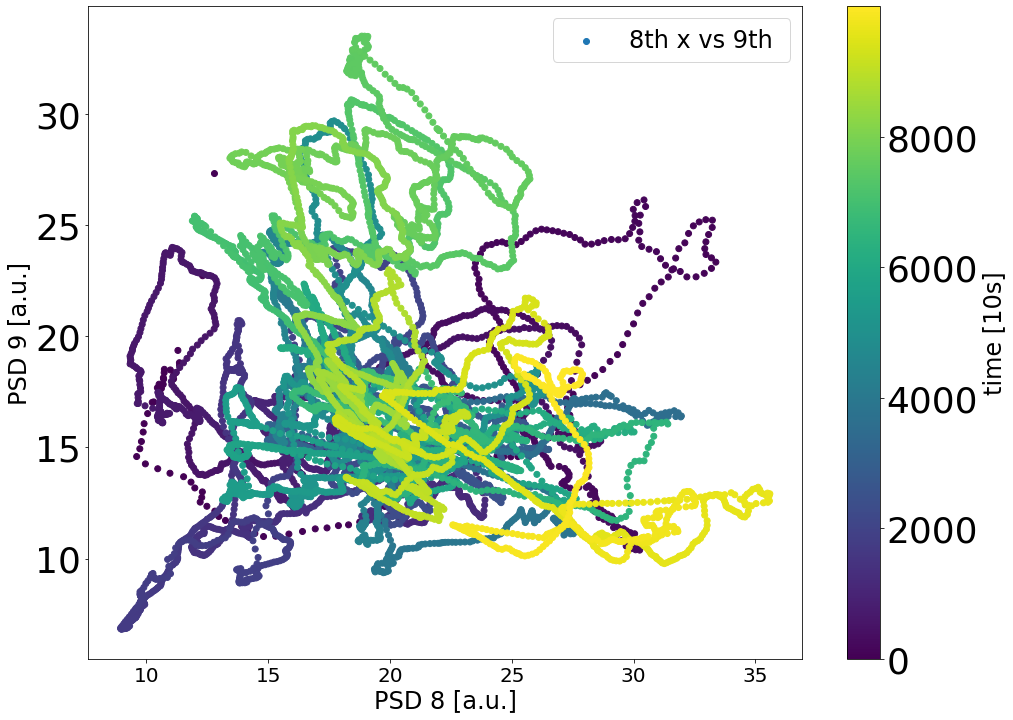

In [459]:
for i in [7]:
    fig, ax = plt.subplots()
    cm = plt.cm.get_cmap('viridis')
    caxis = df_z.index
    x = np.arange(0,100000,10)
    y1=np.multiply(1,df_z["list%d"%i].ewm(span=200,adjust=True).mean())
    y2=np.multiply(1/df_x["list%d" %i].mean()*df_z["list%d"%i].mean(),df_x["list%d"%i].ewm(span=200,adjust=True).mean()) 
    y3=np.multiply(1/df_x["list%d" %i].mean()*df_z["list%d"%i].mean(),df_x["list%d"%(i+1)].ewm(span=200,adjust=True).mean())

    s=plt.scatter(y2,y3,c=caxis,cmap=cm,label="%dth x vs %dth " %((i+1),(i+2)))
    #plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
plt.ylabel("PSD %d [a.u.]" %(i+2))
plt.xlabel("PSD %d [a.u.]" %(i+1))
plt.legend()
plt.savefig("%dth_correlation_x_x_20200519.png" %(i+1),dpi=100,bbox_inches="tight")
plt.show()
 

In [480]:
make_random = np.random.random(10000)
make_random2 = np.random.random(10000)

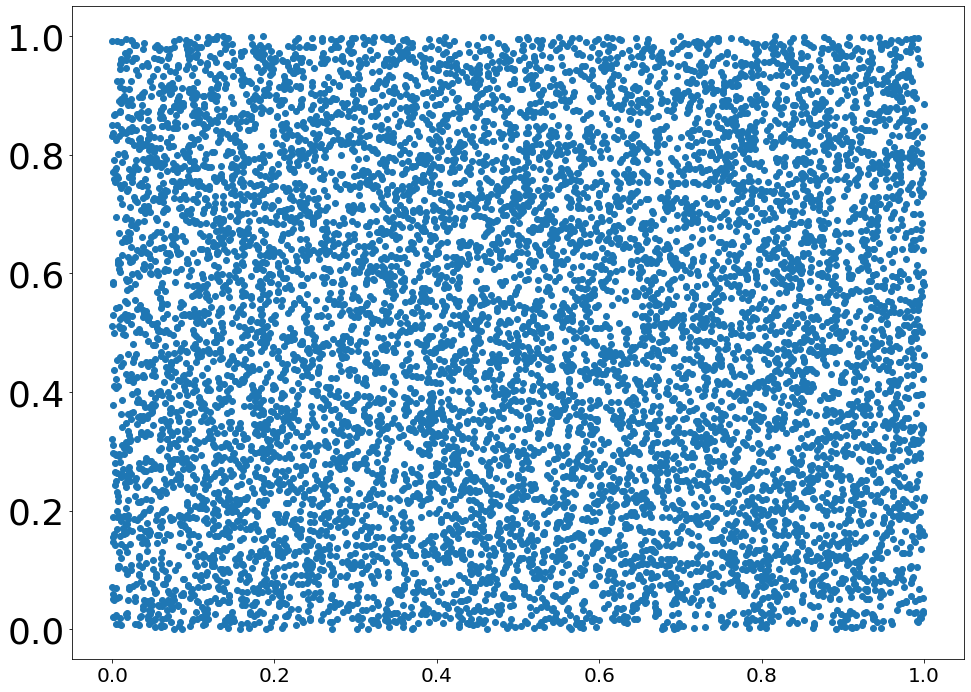

In [485]:
plt.scatter(make_random,make_random2)

In [486]:
df_random = pd.DataFrame()

In [489]:
df_random["C1"] = make_random
df_random["C2"] = make_random2

In [491]:
df_random = df_random.reset_index()

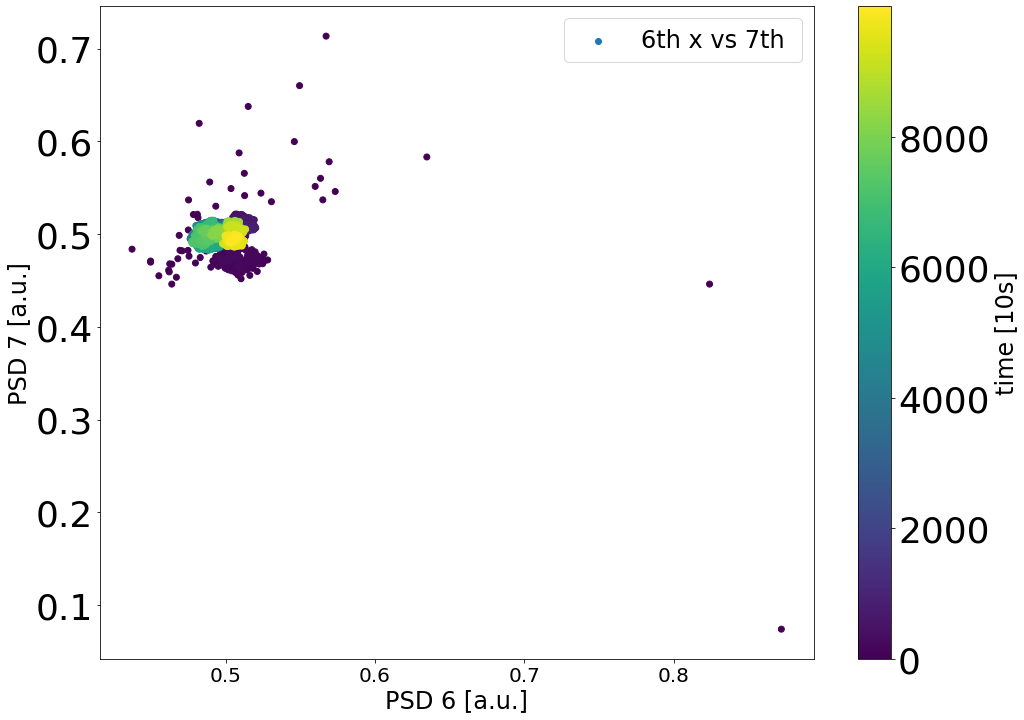

In [502]:
fig, ax = plt.subplots()
cm = plt.cm.get_cmap('viridis')
caxis = df_z.index
x = np.arange(0,100000,10)
y2= df_random.C1.ewm(span=1000,adjust=True).mean()
y3= df_random.C2.ewm(span=1000,adjust=True).mean()
s=plt.scatter(y2,y3,c=caxis,cmap=cm,label="%dth x vs %dth " %((i+1),(i+2)))
#plt.scatter(y1,y3,label="z vs spin")
plt.colorbar(s,label="time [10s]")
plt.ylabel("PSD %d [a.u.]" %(i+2))
plt.xlabel("PSD %d [a.u.]" %(i+1))
plt.legend()
plt.savefig("%dth_correlation_x_x_20200519.png" %(i+1),dpi=100,bbox_inches="tight")
plt.show()
